plottable是一个Python库，用于在matplotlib中绘制精美定制的图形表格。plottable的官方仓库地址为：[plottable](https://github.com/znstrider/plottable)。本文主要参考其官方文档，plottable的官方文档地址为：[plottable-doc](https://plottable.readthedocs.io/en/latest/index.html#)。plottable安装命令如下：

> pip install plottable

In [30]:
# jupyter notebook环境去除warning
import warnings
warnings.filterwarnings("ignore")
import plottable
# 打印plottable版本
print('plottable version:', plottable.__version__)
# 打印matplotlib版本
import matplotlib as plt
print('matplotlib version:', plt.__version__)

plottable version: 0.1.5
matplotlib version: 3.5.3


# 1 使用说明

## 1.1 基础使用

下面的代码展示了一个简单的图形表格绘制示例，plottable提供了Table类以创建和展示图形表格。

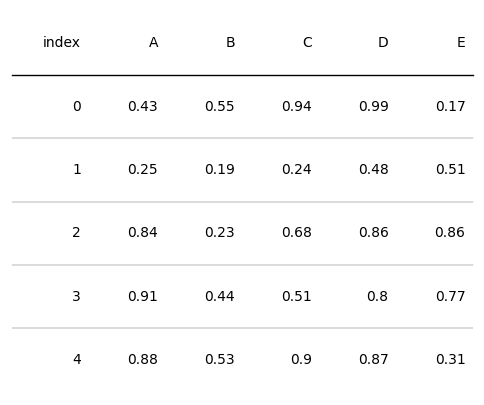

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plottable import Table

# 生成一个包含随机数据的表格
d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# 基于pandas表格数据创建和展示图形表格
tab = Table(d)

# 保存图片
plt.savefig("table.jpg", dpi=300,bbox_inches='tight')
plt.show()

对于plottable的Table类，其构造参数介绍如下：

- df: pd.DataFrame, 要显示为表格的DataFrame对象
- ax: mpl.axes.Axes, 绘制表格的坐标轴对象，默认为None
- index_col: str, DataFrame中的索引列名。默认为None
- columns: List[str], 哪些列用于绘图。为None表示使用所有列
- column_definitions: List[ColumnDefinition], 需要设置样式列的style定义类，默认为None
- textprops: Dict[str, Any], 文本属性的字典，默认为空字典
- cell_kw: Dict[str, Any], 单元格属性的字典，默认为空字典
- col_label_cell_kw: Dict[str, Any], 列标签单元格属性的字典，默认为空字典
- col_label_divider: bool, 是否在列标签下方绘制分隔线，默认为True。
- footer_divider: bool, 是否在表格下方绘制分隔线，默认为False。
- row_dividers: bool, 是否显示行分隔线，默认为True
- row_divider_kw: Dict[str, Any], 行分隔线属性的字典，默认为空字典
- col_label_divider_kw: Dict[str, Any], 列标签分隔线属性的字典，默认为空字典
- footer_divider_kw: Dict[str, Any], 页脚分隔线属性的字典，默认为空字典
- column_border_kw: Dict[str, Any], 列边框属性的字典，默认为空字典
- even_row_color: str | Tuple, 偶数行单元格的填充颜色，默认为None
- odd_row_color: str | Tuple, 奇数行单元格的填充颜色，默认为None


在这些参数之中，控制表格绘图效果的参数有以下几类：

+ column_definitions：列的样式自定义
+ textprops：文本的样样式自定义
+ cell_kw：表格单元格的样式自定义
+ 其他设置参数的样式

在这些参数中，最重要的参数是column_definitions，因为column_definitions可以控制几乎所有的绘图效果。接下来本文主要对column_definitions的使用进行具体介绍。

## 1.2 列的样式自定义

plottable提供了ColumnDefinition类（别名ColDef）来自定义图形表格的单个列的样式。ColumnDefinition类的构造参数如下：

- name: str，要设置绘图效果的列名
- title: str = None，用于覆盖列名的绘图标题
- width: float = 1，列的宽度，默认情况下各列的宽度为轴的宽度/列的总数
- textprops: Dict[str, Any] = field(default_factory=dict)，提供给每个文本单元格的文本属性
- formatter: Callable = None，用于格式化文本外观的可调用函数
- cmap: Callable = None，根据单元格的值返回颜色的可调用函数
- text_cmap: Callable = None，根据单元格的值返回颜色的可调用函数
- group: str = None，设置每个组都会在列标签上方显示的分组列标签
- plot_fn: Callable = None，一个可调用函数，将单元格的值作为输入，并在每个单元格上创建一个子图并绘制在其上
要向其传递其他参数
- plot_kw: Dict[str, Any] = field(default_factory=dict)，提供给plot_fn的附加关键字参数
- border: str | List = None，绘制垂直边界线，可以是"left" / "l"、"right" / "r"或"both"

通过ColumnDefinition类来设置Table类的column_definitions参数，可以实现不同表格列样式的效果。如果是同时多个列的绘图效果，则需要使用[ColumnDefinition,ColumnDefinition]列表的形式。一些使用示例如下

**设置列标题和列宽**

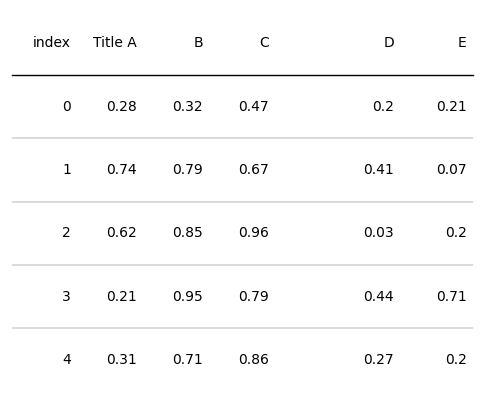

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plottable import ColumnDefinition, ColDef, Table

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# name表示设置哪个列的样式
tab = Table(d, column_definitions=[ColumnDefinition(name="A", title="Title A"),
                                   ColumnDefinition(name="D", width=2)])

plt.show()

**设置列的文字属性和文本格式**

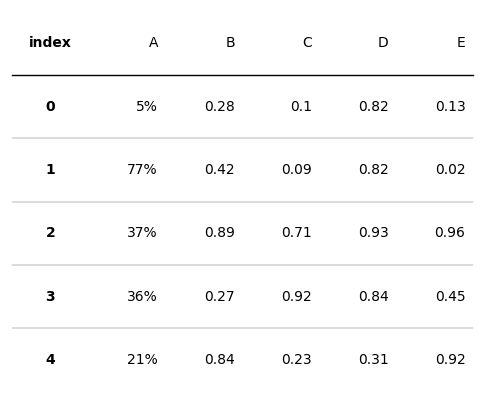

In [33]:
from plottable.formatters import decimal_to_percent

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# index列的文字居中，加粗
# 列A的文本数值改为百分制
tab = Table(d, column_definitions=[ColumnDefinition(name="index", textprops={"ha": "center", "weight": "bold"}),
                                   ColumnDefinition(name="A", formatter=decimal_to_percent)])

plt.show()

**设置列单元格背景色和字体颜色**

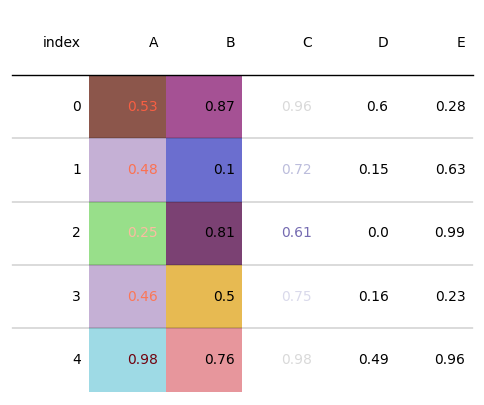

In [34]:
from plottable.cmap import normed_cmap
import matplotlib.cm

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# cmap设置单元格背景色
tab = Table(d, column_definitions=[ColumnDefinition(name="A", cmap=matplotlib.cm.tab20, text_cmap=matplotlib.cm.Reds),
                                   ColumnDefinition(name="B", cmap=matplotlib.cm.tab20b),
                                   ColumnDefinition(name="C", text_cmap=matplotlib.cm.tab20c)])

plt.show()

**设置列的分组名**

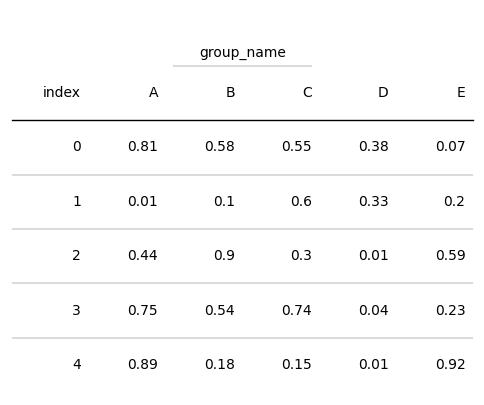

In [35]:
from plottable.cmap import normed_cmap
import matplotlib.cm

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# 将列B和列C视为同一组，该组命名为group_name
tab = Table(d, column_definitions=[ColumnDefinition(name="B", group="group_name"), 
                                   ColumnDefinition(name="C", group="group_name")])

plt.show()

**设置列边框**

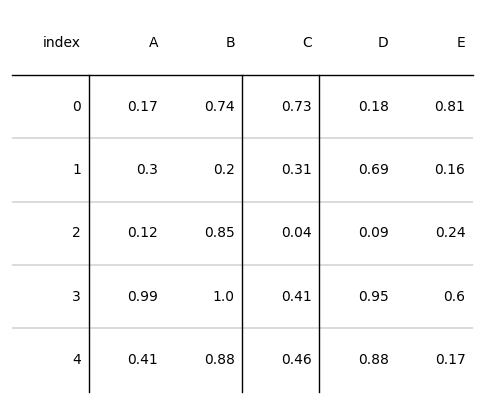

In [36]:
from plottable.cmap import normed_cmap
import matplotlib.cm

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# 将列B和列C视为同一组，该组命名为group_name
tab = Table(d, column_definitions=[ColumnDefinition(name="A", border="l"), 
                                   ColumnDefinition(name="C",  border="both")])

plt.show()

**调用函数的使用**

ColumnDefinition类的plot_fn和plot_kw参数提供了自定义函数实现表格效果绘制的功能。其中plot_fn表示待调用的函数，plot_kw表示待调用函数的输入参数。此外在plotable.plots预置了一些效果函数，我们可以参考这些效果函数定义自己的绘图函数。预置效果函数如下：

In [37]:
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from plottable import ColumnDefinition, Table
# 调用预置绘图函数
from plottable.plots import image,monochrome_image,circled_image,bar,percentile_bars,percentile_stars,progress_donut

cmap = matplotlib.cm.tab20

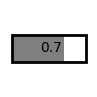

In [38]:
# 柱状图绘制
fig, ax = plt.subplots(figsize=(1, 1))
# 0.7表示数值,lw边框线宽
b = bar(ax, 0.7, plot_bg_bar=True, cmap=cmap, annotate=True, lw=2, height=0.35)
plt.show()

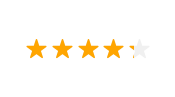

In [39]:
# 星星百分比图
fig, ax = plt.subplots(figsize=(2, 1))
stars = percentile_stars(ax, 85, background_color="#f0f0f0")

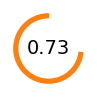

In [40]:
# 圆环图
fig, ax = plt.subplots(figsize=(1, 1))
donut = progress_donut(ax, 73, textprops={"fontsize": 14})
plt.show()

对于待调用的函数，可以通过help函数查看这些函数的参数含义。

In [41]:
help(progress_donut)

Help on function progress_donut in module plottable.plots:

progress_donut(ax: matplotlib.axes._axes.Axes, val: float, radius: float = 0.45, color: str = None, background_color: str = None, width: float = 0.05, is_pct: bool = False, textprops: Dict[str, Any] = {}, formatter: Callable = None, **kwargs) -> List[matplotlib.patches.Wedge]
    Plots a Progress Donut on the axes.
    
    Args:
        ax (matplotlib.axes.Axes): Axes
        val (float): value
        radius (float, optional):
            radius of the progress donut. Defaults to 0.45.
        color (str, optional):
            color of the progress donut. Defaults to None.
        background_color (str, optional):
            background_color of the progress donut where the value is not reached. Defaults to None.
        width (float, optional):
            width of the donut wedge. Defaults to 0.05.
        is_pct (bool, optional):
            whether the value is given not as a decimal, but as a value between 0 and 100.
 

通过plot_fn和plot_kw参数设置自定义绘图函数和函数输入参数，可以展示不同的绘图效果，如下所示：

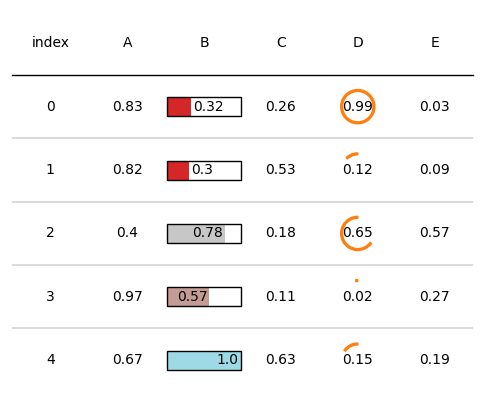

In [42]:
from plottable.cmap import normed_cmap
import matplotlib.cm

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# plot_fn和plot_kw
tab = Table(d, textprops={"ha": "center"},
            column_definitions=[ColumnDefinition(name="B", plot_fn=bar,plot_kw={'plot_bg_bar':True,'cmap':cmap, 
                                'annotate':True, 'height':0.5}),
                                ColumnDefinition(name="D", plot_fn=progress_donut,plot_kw={'is_pct':True,})])

plt.show()

**自定义文字格式**

plottable提供了以下三个自定义函数来表示不同的文字格式：

+ decimal_to_percent：将数值数据变为百分比
+ tickcross：将数值格式化为✔或✖
+ signed_integer：添加正负符号

我们可以通过ColumnDefinition的formatter来设置文字格式，如下所示：

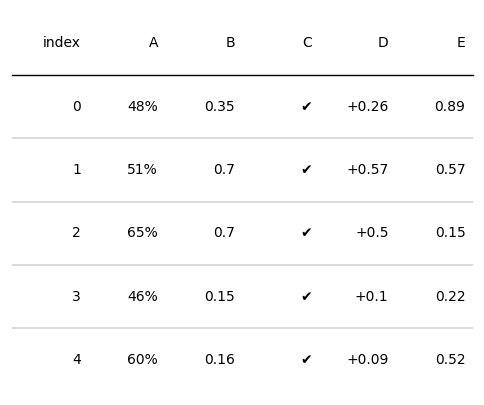

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.formatters import decimal_to_percent,tickcross,signed_integer

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
tab = Table(d, column_definitions=[ColumnDefinition(name="A", formatter=decimal_to_percent),
                                   ColumnDefinition(name="C", formatter=tickcross),
                                   ColumnDefinition(name="D", formatter=signed_integer)])

plt.show()

此外，也可以自定义函数来设置文本格式，如下所示：

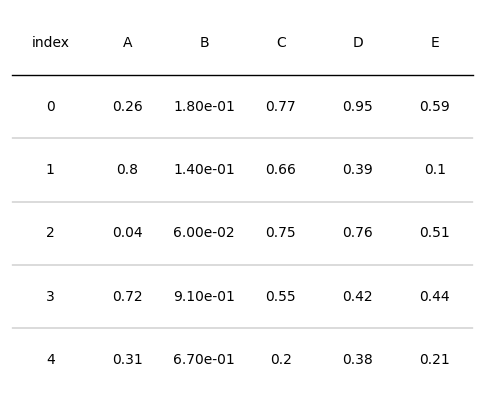

In [44]:
def setformat(x):
    # 使用format格式函数
    return "{:.2e}".format(x)

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
tab = Table(d, textprops={"ha": "center"},column_definitions=[ColumnDefinition(name="B", formatter=setformat),
                                   ColumnDefinition(name="D", formatter=lambda x: round(x, 2))])

plt.show()

## 1.3 行列自定义

**访问行列单元格**

plottable提供了直接访问Table实例的某一行、某一列的方法，如下所示：

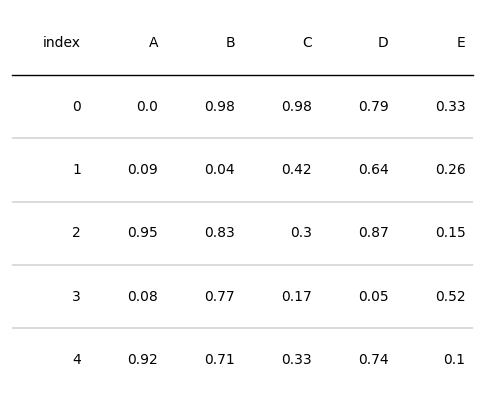

In [45]:
from plottable.cmap import normed_cmap
import matplotlib.cm

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# 实例化Table对象
tab = Table(d)

In [46]:
# 根据列名，提取整列
tab.columns['A']

Column(cells=[TextCell(xy=(1, 0), content=0.0, row_idx=0, col_idx=1), TextCell(xy=(1, 1), content=0.09, row_idx=1, col_idx=1), TextCell(xy=(1, 2), content=0.95, row_idx=2, col_idx=1), TextCell(xy=(1, 3), content=0.08, row_idx=3, col_idx=1), TextCell(xy=(1, 4), content=0.92, row_idx=4, col_idx=1)], index=1)

In [47]:
# 读取某列第1行的内容
tab.columns['B'].cells[1].content

0.04

In [48]:
# 根据行索引，提取整行
tab.rows[1]

Row(cells=[TextCell(xy=(0, 1), content=1, row_idx=1, col_idx=0), TextCell(xy=(1, 1), content=0.09, row_idx=1, col_idx=1), TextCell(xy=(2, 1), content=0.04, row_idx=1, col_idx=2), TextCell(xy=(3, 1), content=0.42, row_idx=1, col_idx=3), TextCell(xy=(4, 1), content=0.64, row_idx=1, col_idx=4), TextCell(xy=(5, 1), content=0.26, row_idx=1, col_idx=5)], index=1)

In [49]:
# 提取表头列名
tab.col_label_row

Row(cells=[TextCell(xy=(0, -1), content=index, row_idx=-1, col_idx=0), TextCell(xy=(1, -1), content=A, row_idx=-1, col_idx=1), TextCell(xy=(2, -1), content=B, row_idx=-1, col_idx=2), TextCell(xy=(3, -1), content=C, row_idx=-1, col_idx=3), TextCell(xy=(4, -1), content=D, row_idx=-1, col_idx=4), TextCell(xy=(5, -1), content=E, row_idx=-1, col_idx=5)], index=-1)

**设置单元格样式**

在上面的例子可以看到plottable直接访问表格行列对象，因此我们可以通过设置这些对象的绘图属性来直接更改其绘图效果或文字效果，所支持更改的属性如下：

- 单元格属性
  + set_alpha：设置单元格的透明度。
  + set_color：设置单元格的颜色。
  + set_edgecolor：设置单元格边缘的颜色。
  + set_facecolor：设置单元格内部的颜色。
  + set_fill：设置单元格是否填充。
  + set_hatch：设置单元格的填充图案。
  + set_linestyle：设置单元格边缘线的样式。
  + set_linewidth：设置单元格边缘线的宽度。
- 字体属性
  + set_fontcolor：设置字体的颜色。
  + set_fontfamily：设置字体的家族。
  + set_fontsize：设置字体的大小。
  + set_ha：设置文本的水平对齐方式。
  + set_ma：设置文本的垂直对齐方式。
  
 示例代码如下：

Column(cells=[TextCell(xy=(2, 0), content=0.38, row_idx=0, col_idx=2), TextCell(xy=(2, 1), content=0.69, row_idx=1, col_idx=2), TextCell(xy=(2, 2), content=0.15, row_idx=2, col_idx=2), TextCell(xy=(2, 3), content=0.74, row_idx=3, col_idx=2), TextCell(xy=(2, 4), content=0.41, row_idx=4, col_idx=2)], index=2)

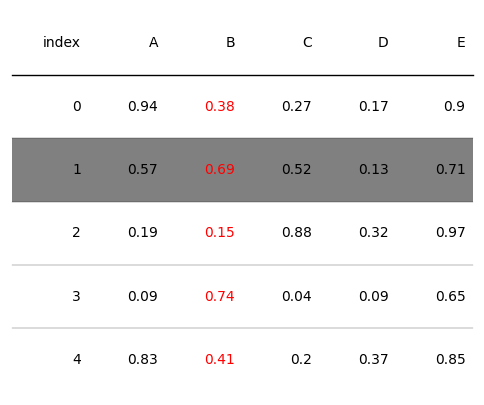

In [50]:
from plottable.cmap import normed_cmap
import matplotlib.cm

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)
fig, ax = plt.subplots(figsize=(6, 5))
# 实例化Table对象
tab = Table(d)
# 设置行号为1的行的背景颜色
tab.rows[1].set_facecolor("grey")
# 设置B列的字体颜色
tab.columns['B'].set_fontcolor("red")

# 2 绘图实例

## 2.1 多行样式设置

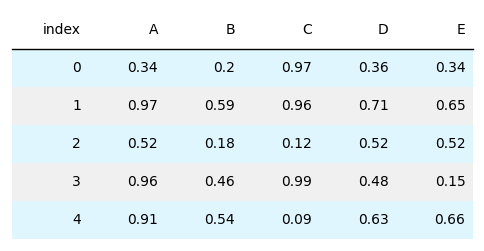

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plottable import Table

d = pd.DataFrame(np.random.random((5, 5)), columns=["A", "B", "C", "D", "E"]).round(2)

fig, ax = plt.subplots(figsize=(6, 3))

# row_dividers显示行的分割线
# odd_row_color奇数行颜色
# even_row_color偶数行颜色
tab = Table(d, row_dividers=False, odd_row_color="#f0f0f0", even_row_color="#e0f6ff")

plt.show()

fig.savefig("table.jpg",dpi=300,bbox_inches='tight')

## 2.2 自定义单元格效果

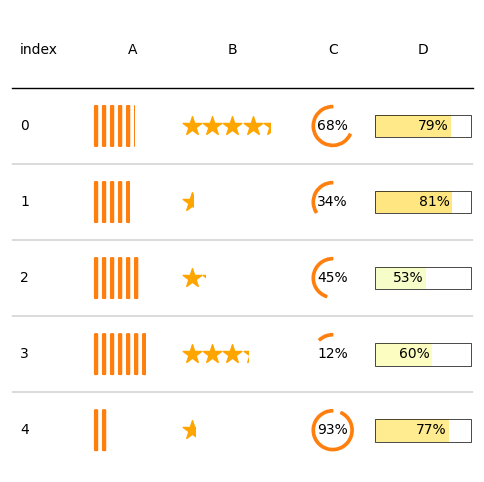

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.formatters import decimal_to_percent
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut

# 自定义颜色
cmap = LinearSegmentedColormap.from_list(
    name="BuYl", colors=["#01a6ff", "#eafedb", "#fffdbb", "#ffc834"], N=256
)

fig, ax = plt.subplots(figsize=(6, 6))

d = pd.DataFrame(np.random.random((5, 4)), columns=["A", "B", "C", "D"]).round(2)

tab = Table(
    d,
    cell_kw={
        "linewidth": 0,
        "edgecolor": "k",
    },
    textprops={"ha": "center"},
    column_definitions=[
        ColumnDefinition("index", textprops={"ha": "left"}),
        ColumnDefinition("A", plot_fn=percentile_bars, plot_kw={"is_pct": True}),
        ColumnDefinition(
            "B", width=1.5, plot_fn=percentile_stars, plot_kw={"is_pct": True}
        ),
        ColumnDefinition(
            "C",
            plot_fn=progress_donut,
            plot_kw={
                "is_pct": True,
                "formatter": "{:.0%}"
                },
            ),
        ColumnDefinition(
            "D",
            width=1.25,
            plot_fn=bar,
            plot_kw={
                "cmap": cmap,
                "plot_bg_bar": True,
                "annotate": True,
                "height": 0.5,
                "lw": 0.5,
                "formatter": decimal_to_percent,
            },
        ),
    ],
)

plt.show()

## 2.3 热图

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
# ColDef是ColumnDefinition的别名
from plottable import ColDef, Table

# 自定义颜色
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

In [54]:
# 创建数据
cities = [
    "TORONTO",
    "VANCOUVER",
    "HALIFAX",
    "CALGARY",
    "OTTAWA",
    "MONTREAL",
    "WINNIPEG",
    "EDMONTON",
    "LONDON",
    "ST. JONES",
]
months = [
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
]

data = np.random.random((10, 12)) + np.abs(np.arange(12) - 5.5)
data = (1 - data / (np.max(data)))
data.shape

(10, 12)

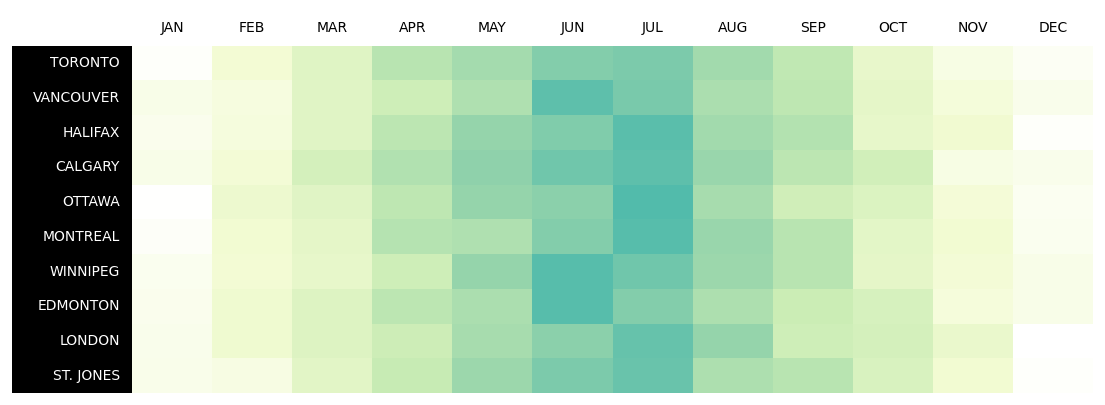

In [55]:
# 绘图
d = pd.DataFrame(data, columns=months, index=cities).round(2)
fig, ax = plt.subplots(figsize=(14, 5))

# 自定义各列的绘图效果
column_definitions = [
    ColDef(name, cmap=cmap, formatter=lambda x: "") for name in months
] + [ColDef("index", title="", width=1.5, textprops={"ha": "right"})]

tab = Table(
    d,
    column_definitions=column_definitions,
    row_dividers=False,
    col_label_divider=False,
    textprops={"ha": "center", "fontname": "Roboto"},
    # 设置各个单元格的效果
    cell_kw={
        "edgecolor": "black",
        "linewidth": 0,
    },
)


# 设置列标题文字和背景颜色
tab.col_label_row.set_facecolor("white")
tab.col_label_row.set_fontcolor("black")
# 设置行标题文字和背景颜色
tab.columns["index"].set_facecolor("black")
tab.columns["index"].set_fontcolor("white")
tab.columns["index"].set_linewidth(0)

plt.show()

## 2.4 女子世界杯预测数据展示

**step1 准备数据**

下载示例数据，所有示例数据在[plottable-example_notebooks](https://github.com/znstrider/plottable/tree/master/docs/example_notebooks)。

In [56]:
# 下载数据集
# !wget https://raw.githubusercontent.com/znstrider/plottable/master/docs/example_notebooks/data/wwc_forecasts.csv

In [57]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

In [58]:
cols = [
    "team",
    "points",
    "group",
    "spi",
    "global_o",
    "global_d",
    "group_1",
    "group_2",
    "group_3",
    "make_round_of_16",
    "make_quarters",
    "make_semis",
    "make_final",
    "win_league",
]

# 读取数据
df = pd.read_csv(
    "data/wwc_forecasts.csv",
    usecols=cols,
)

# 展示数据
df.head()

,team,group,spi,global_o,global_d,group_1,group_2,group_3,make_round_of_16,make_quarters,make_semis,make_final,win_league,points
0,USA,F,98.32748,5.52561,0.58179,0.82956,0.17044,0.00000,1.0,0.78079,0.47307,0.35076,0.23618,6
1,France,A,96.29671,4.31375,0.52137,0.99483,0.00515,0.00002,1.0,0.78367,0.42052,0.30038,0.19428,6
2,Germany,B,93.76549,3.96791,0.67818,0.98483,0.01517,0.00000,1.0,0.89280,0.48039,0.27710,0.12256,6
3,Canada,E,93.51599,3.67537,0.56980,0.38830,0.61170,0.00000,1.0,0.59192,0.36140,0.20157,0.09031,6
4,England,D,91.92311,3.51560,0.63717,0.70570,0.29430,0.00000,1.0,0.68510,0.43053,0.16465,0.08003,6


此外，我们需要准备每个国家对应的国旗图片，该数据也在[plottable-example_notebooks](https://github.com/znstrider/plottable/tree/master/docs/example_notebooks)下。

In [59]:
# 读取图片路径
flag_paths = list(Path("data/country_flags").glob("*.png"))
country_to_flagpath = {p.stem: p for p in flag_paths}

**step2 数据处理**

该步需要合并数据，将其转换为plottable可用的数据结构。

In [60]:
# 重置列名
colnames = [
    "Team",
    "Points",
    "Group",
    "SPI",
    "OFF",
    "DEF",
    "1st Place",
    "2nd Place",
    "3rd Place",
    "Make Rd Of 16",
    "Make Quarters",
    "Make Semis",
    "Make Finals",
    "Win World Cup",
]

col_to_name = dict(zip(cols, colnames))
col_to_name

{'team': 'Team',
 'points': 'Points',
 'group': 'Group',
 'spi': 'SPI',
 'global_o': 'OFF',
 'global_d': 'DEF',
 'group_1': '1st Place',
 'group_2': '2nd Place',
 'group_3': '3rd Place',
 'make_round_of_16': 'Make Rd Of 16',
 'make_quarters': 'Make Quarters',
 'make_semis': 'Make Semis',
 'make_final': 'Make Finals',
 'win_league': 'Win World Cup'}

In [61]:
df[["spi", "global_o", "global_d"]] = df[["spi", "global_o", "global_d"]].round(1)

df = df.rename(col_to_name, axis=1)
# 删除Points列
df = df.drop("Points", axis=1)
# 插入列
df.insert(0, "Flag", df["Team"].apply(lambda x: country_to_flagpath.get(x)))
df = df.set_index("Team")
df.head()

,Flag,Group,SPI,OFF,DEF,1st Place,2nd Place,3rd Place,Make Rd Of 16,Make Quarters,Make Semis,Make Finals,Win World Cup
Team,,,,,,,,,,,,,
USA,data/country_flags/USA.png,F,98.3,5.5,0.6,0.82956,0.17044,0.00000,1.0,0.78079,0.47307,0.35076,0.23618
France,data/country_flags/France.png,A,96.3,4.3,0.5,0.99483,0.00515,0.00002,1.0,0.78367,0.42052,0.30038,0.19428
Germany,data/country_flags/Germany.png,B,93.8,4.0,0.7,0.98483,0.01517,0.00000,1.0,0.89280,0.48039,0.27710,0.12256
Canada,data/country_flags/Canada.png,E,93.5,3.7,0.6,0.38830,0.61170,0.00000,1.0,0.59192,0.36140,0.20157,0.09031
England,data/country_flags/England.png,D,91.9,3.5,0.6,0.70570,0.29430,0.00000,1.0,0.68510,0.43053,0.16465,0.08003


**step3 绘图**

In [62]:
# 设置颜色
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

In [63]:
team_rating_cols = ["SPI", "OFF", "DEF"]
group_stage_cols = ["1st Place", "2nd Place", "3rd Place"]
knockout_stage_cols = list(df.columns[-5:])

# 单独设置每一列的绘制参数
col_defs = (
    # 绘制第一部分效果
    [
        ColumnDefinition(
            name="Flag",
            title="",
            textprops={"ha": "center"},
            width=0.5,
            # 设置自定义效果展示函数
            plot_fn=circled_image,
        ),
        ColumnDefinition(
            name="Team",
            textprops={"ha": "left", "weight": "bold"},
            width=1.5,
        ),
        ColumnDefinition(
            name="Group",
            textprops={"ha": "center"},
            width=0.75,
        ),
        ColumnDefinition(
            name="SPI",
            group="Team Rating",
            textprops={"ha": "center"},
            width=0.75,
        ),
        ColumnDefinition(
            name="OFF",
            width=0.75,
            textprops={
                "ha": "center",
                # 设置填充方式
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["OFF"], cmap=matplotlib.cm.PiYG, num_stds=2.5),
            group="Team Rating",
        ),
        ColumnDefinition(
            name="DEF",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["DEF"], cmap=matplotlib.cm.PiYG_r, num_stds=2.5),
            group="Team Rating",
        ),
    ]
    # 绘制第二部分效果
    + [
        ColumnDefinition(
            name=group_stage_cols[0],
            title=group_stage_cols[0].replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            group="Group Stage Chances",
            # 设置边框
            border="left",
        )
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col.replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            group="Group Stage Chances",
        )
        for col in group_stage_cols[1:]
    ]
    # 绘制第三部分效果
    + [
        ColumnDefinition(
            name=knockout_stage_cols[0],
            title=knockout_stage_cols[0].replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            cmap=cmap,
            group="Knockout Stage Chances",
            border="left",
        )
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col.replace(" ", "\n", 1),
            formatter=decimal_to_percent,
            cmap=cmap,
            group="Knockout Stage Chances",
        )
        for col in knockout_stage_cols[1:]
    ]
)

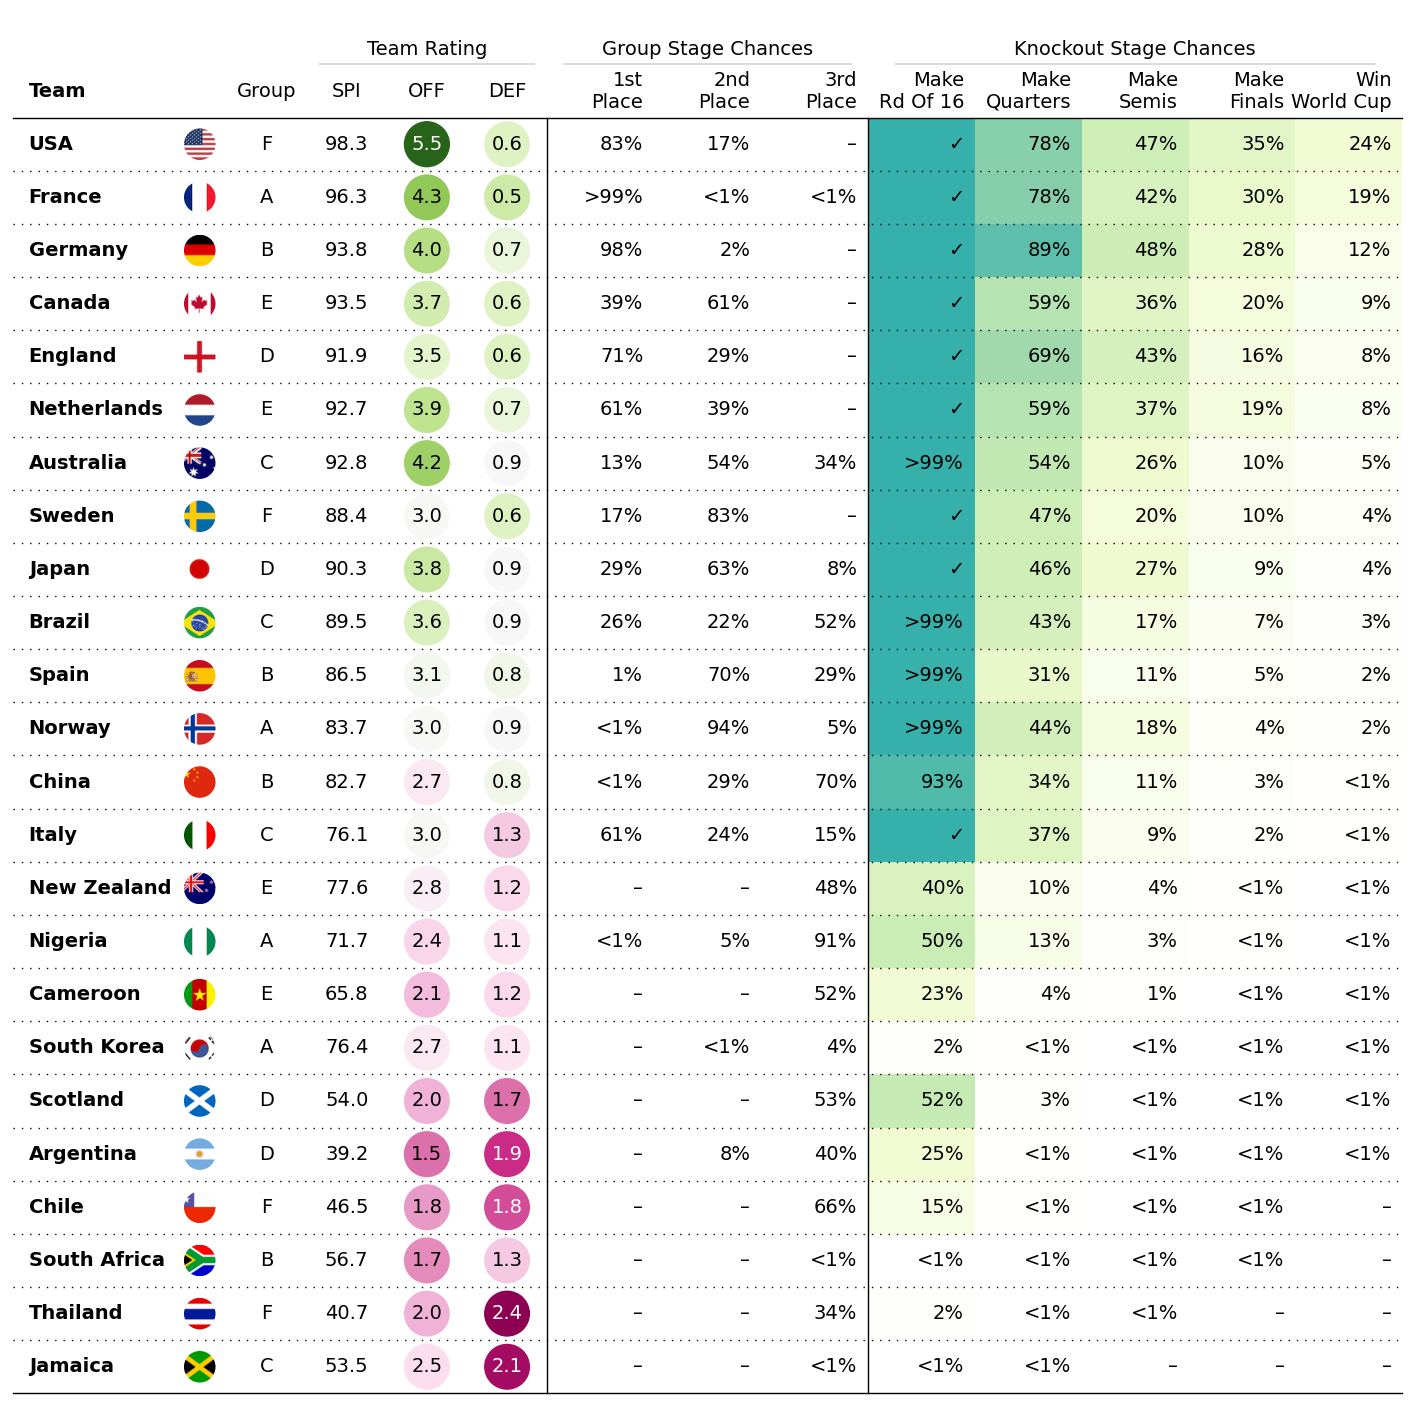

In [64]:
# 绘图
fig, ax = plt.subplots(figsize=(18, 18))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
).autoset_fontcolors(colnames=["OFF", "DEF"])


plt.show()
# 保存图片
fig.savefig("wwc_table.jpg", facecolor=ax.get_facecolor(), dpi=300,bbox_inches='tight')

## 2.5 德甲积分排名榜展示

**step1 准备数据**

In [65]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plottable import ColDef, Table
from plottable.plots import image

In [66]:
# 下载联赛数据
# !wget https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv
# !wget https://projects.fivethirtyeight.com/soccer-api/club/spi_matches_latest.csv

In [67]:
# 数据地址
FIVETHIRTYEIGHT_URLS = {
    "SPI_MATCHES": "https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv",
    "SPI_MATCHES_LATEST": "https://projects.fivethirtyeight.com/soccer-api/club/spi_matches_latest.csv",
}

# 读取数据
# df = pd.read_csv(FIVETHIRTYEIGHT_URLS["SPI_MATCHES_LATEST"])
df = pd.read_csv("data/spi_matches_latest.csv")
df.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,0.5755,0.1740,...,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00
1,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,0.2387,0.5203,...,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26
2,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,0.7832,0.0673,...,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,0.2276,0.5226,...,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,0.4403,0.2932,...,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10


In [68]:
# 筛选德甲联赛数据,并删除为空数据
bl = df.loc[df.league == "German Bundesliga"].dropna()
bl.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
497,2022,2022-08-05,1845,German Bundesliga,Eintracht Frankfurt,Bayern Munich,68.47,91.75,0.1350,0.6796,...,32.6,71.9,1.0,6.0,0.83,4.50,0.65,2.72,1.05,5.96
514,2022,2022-08-06,1845,German Bundesliga,VfL Bochum,Mainz,60.73,68.88,0.3568,0.3629,...,33.5,34.5,1.0,2.0,1.00,1.62,0.96,0.86,1.05,2.10
515,2022,2022-08-06,1845,German Bundesliga,Borussia Monchengladbach,TSG Hoffenheim,69.38,66.77,0.4872,0.2742,...,40.2,33.3,3.0,1.0,1.86,0.10,2.51,0.31,2.36,1.05
516,2022,2022-08-06,1845,German Bundesliga,VfL Wolfsburg,Werder Bremen,68.18,59.82,0.5319,0.2014,...,30.2,33.3,2.0,2.0,0.81,0.97,1.07,1.25,2.10,2.10
517,2022,2022-08-06,1845,German Bundesliga,1. FC Union Berlin,Hertha Berlin,69.98,59.70,0.5479,0.1860,...,34.9,33.0,3.0,1.0,1.25,0.40,1.66,0.36,3.15,1.05


**step2 数据处理**

In [69]:
# 统计得分
def add_points(df: pd.DataFrame) -> pd.DataFrame:
    # 三元表达式
    # df["score1"] > df["score2"]，则返回3
    # np.where(df["score1"] == df["score2"]，则返回1
    # 否则为0
    df["pts_home"] = np.where(
        df["score1"] > df["score2"], 3, np.where(df["score1"] == df["score2"], 1, 0)
    )
    df["pts_away"] = np.where(
        df["score1"] < df["score2"], 3, np.where(df["score1"] == df["score2"], 1, 0)
    )
    
    return df

# 统计得分数据
bl = add_points(bl)

In [81]:
# 总得分、总进球数、总助攻数和总黄牌数

# 以下代码先分别统计team1和team2的得分数据，然后将两组数据相加
perform = (
    bl.groupby("team1")[[
        "pts_home",
        "score1",
        "score2",
        "xg1",
        "xg2",
    ]]
    .sum()
    .set_axis(
        [
            "pts",
            "gf",
            "ga",
            "xgf",
            "xga",
        ],
        axis=1,
    )
    .add(
        bl.groupby("team2")[[
            "pts_away",
            "score2",
            "score1",
            "xg2",
            "xg1",
        ]]
        .sum()
        .set_axis(
            [
                "pts",
                "gf",
                "ga",
                "xgf",
                "xga",
            ],
            axis=1,
        )
    )
)

# 由于python和pandas版本问题，如果上面的代码出问题，则使用下面代码
# t1= bl.groupby("team1")[["pts_home","score1","score2","xg1","xg2", ]]
# t1 = t1.sum()
# t1.set_axis( ["pts","gf","ga","xgf","xga", ], axis=1,)
# t2 = bl.groupby("team1")[["pts_home","score1","score2","xg1","xg2", ]]
# t2 = t2.sum()
# t2.set_axis( ["pts","gf","ga","xgf","xga", ], axis=1,)
# perform = (t1.add(t2))

perform.shape

(18, 5)

In [82]:
# 汇总得分表现数据
perform.index.name = "team"

perform["gd"] = perform["gf"] - perform["ga"]

perform = perform[
    [
        "pts",
        "gd",
        "gf",
        "ga",
        "xgf",
        "xga",
    ]
]

perform["games"] = bl.groupby("team1").size().add(bl.groupby("team2").size())
perform.head()

,pts,gd,gf,ga,xgf,xga,games
team,,,,,,,
1. FC Union Berlin,62,13.0,51.0,38.0,35.93,43.06,34
Bayer Leverkusen,50,8.0,57.0,49.0,53.62,48.20,34
Bayern Munich,71,54.0,92.0,38.0,84.93,40.12,34
Borussia Dortmund,71,39.0,83.0,44.0,75.96,42.69,34
Borussia Monchengladbach,43,-3.0,52.0,55.0,53.05,58.88,34


In [83]:
# 统计各队的胜负数据
def get_wins_draws_losses(games: pd.DataFrame) -> pd.DataFrame:
    return (
        games.rename({"pts_home": "pts", "team1": "team"}, axis=1)
        .groupby("team")["pts"]
        .value_counts()
        .add(
            games.rename({"pts_away": "pts", "team2": "team"}, axis=1)
            .groupby("team")["pts"]
            .value_counts(),
            fill_value=0,
        )
        .astype(int)
        .rename("count")
        .reset_index(level=1)
        .pivot(columns="pts", values="count")
        .rename({0: "L", 1: "D", 3: "W"}, axis=1)[["W", "D", "L"]]
    )

wins_draws_losses = get_wins_draws_losses(bl)
wins_draws_losses.head()

pts,W,D,L
team,,,
1. FC Union Berlin,18,8,8
Bayer Leverkusen,14,8,12
Bayern Munich,21,8,5
Borussia Dortmund,22,5,7
Borussia Monchengladbach,11,10,13


In [84]:
# 合并得分和胜负数据
perform = pd.concat([perform, wins_draws_losses], axis=1)
perform.head()

,pts,gd,gf,ga,xgf,xga,games,W,D,L
team,,,,,,,,,,
1. FC Union Berlin,62,13.0,51.0,38.0,35.93,43.06,34,18,8,8
Bayer Leverkusen,50,8.0,57.0,49.0,53.62,48.20,34,14,8,12
Bayern Munich,71,54.0,92.0,38.0,84.93,40.12,34,21,8,5
Borussia Dortmund,71,39.0,83.0,44.0,75.96,42.69,34,22,5,7
Borussia Monchengladbach,43,-3.0,52.0,55.0,53.05,58.88,34,11,10,13


**step3 映射队标图片**

队标图片地址为：[plottable-example_notebooks](https://github.com/znstrider/plottable/tree/master/docs/example_notebooks)

In [85]:
# 创建队名和队标的索引数据
club_logo_path = Path("data/bundesliga_crests_22_23")
club_logo_files = list(club_logo_path.glob("*.png"))
club_logos_paths = {f.stem: f for f in club_logo_files}

In [86]:
perform = perform.reset_index()

# 添加新列
perform.insert(0, "crest", perform["team"])
perform["crest"] = perform["crest"].replace(club_logos_paths)

# 数据排序
perform = perform.sort_values(by=["pts", "gd", "gf"], ascending=False)

for colname in ["gd", "gf", "ga"]:
    perform[colname] = perform[colname].astype("int32")

perform["goal_difference"] = perform["gf"].astype(str) + ":" + perform["ga"].astype(str)

# 添加排名
perform["rank"] = list(range(1, 19))

perform.head()

,crest,team,pts,gd,gf,ga,xgf,xga,games,W,D,L,goal_difference,rank
2,data/bundesliga_crests_22_23/Bayern Munich.png,Bayern Munich,71,54,92,38,84.93,40.12,34,21,8,5,92:38,1
3,data/bundesliga_crests_22_23/Borussia Dortmund...,Borussia Dortmund,71,39,83,44,75.96,42.69,34,22,5,7,83:44,2
10,data/bundesliga_crests_22_23/RB Leipzig.png,RB Leipzig,66,23,64,41,67.01,37.48,34,20,6,8,64:41,3
0,data/bundesliga_crests_22_23/1. FC Union Berli...,1. FC Union Berlin,62,13,51,38,35.93,43.06,34,18,8,8,51:38,4
11,data/bundesliga_crests_22_23/SC Freiburg.png,SC Freiburg,59,7,51,44,53.11,52.25,34,17,8,9,51:44,5


**step4 设定绘图数据**

In [87]:
# 设置颜色
row_colors = {
    "top4": "#2d3636",
    "top6": "#516362",
    "playoffs": "#8d9386",
    "relegation": "#c8ab8d",
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

In [88]:
# 确定绘图列
table_cols = ["crest", "team", "games", "W", "D", "L", "goal_difference", "gd", "pts"]
perform[table_cols].head()

,crest,team,games,W,D,L,goal_difference,gd,pts
2,data/bundesliga_crests_22_23/Bayern Munich.png,Bayern Munich,34,21,8,5,92:38,54,71
3,data/bundesliga_crests_22_23/Borussia Dortmund...,Borussia Dortmund,34,22,5,7,83:44,39,71
10,data/bundesliga_crests_22_23/RB Leipzig.png,RB Leipzig,34,20,6,8,64:41,23,66
0,data/bundesliga_crests_22_23/1. FC Union Berli...,1. FC Union Berlin,34,18,8,8,51:38,13,62
11,data/bundesliga_crests_22_23/SC Freiburg.png,SC Freiburg,34,17,8,9,51:44,7,59


In [89]:
# 定义各列绘图效果
table_col_defs = [
    ColDef("rank", width=0.5, title=""),
    ColDef("crest", width=0.35, plot_fn=image, title=""),
    ColDef("team", width=2.5, title="", textprops={"ha": "left"}),
    ColDef("games", width=0.5, title="Games"),
    ColDef("W", width=0.5),
    ColDef("D", width=0.5),
    ColDef("L", width=0.5),
    ColDef("goal_difference", title="Goals"),
    ColDef("gd", width=0.5, title="", formatter="{:+}"),
    ColDef("pts", border="left", title="Points"),
]

**step5 绘图**

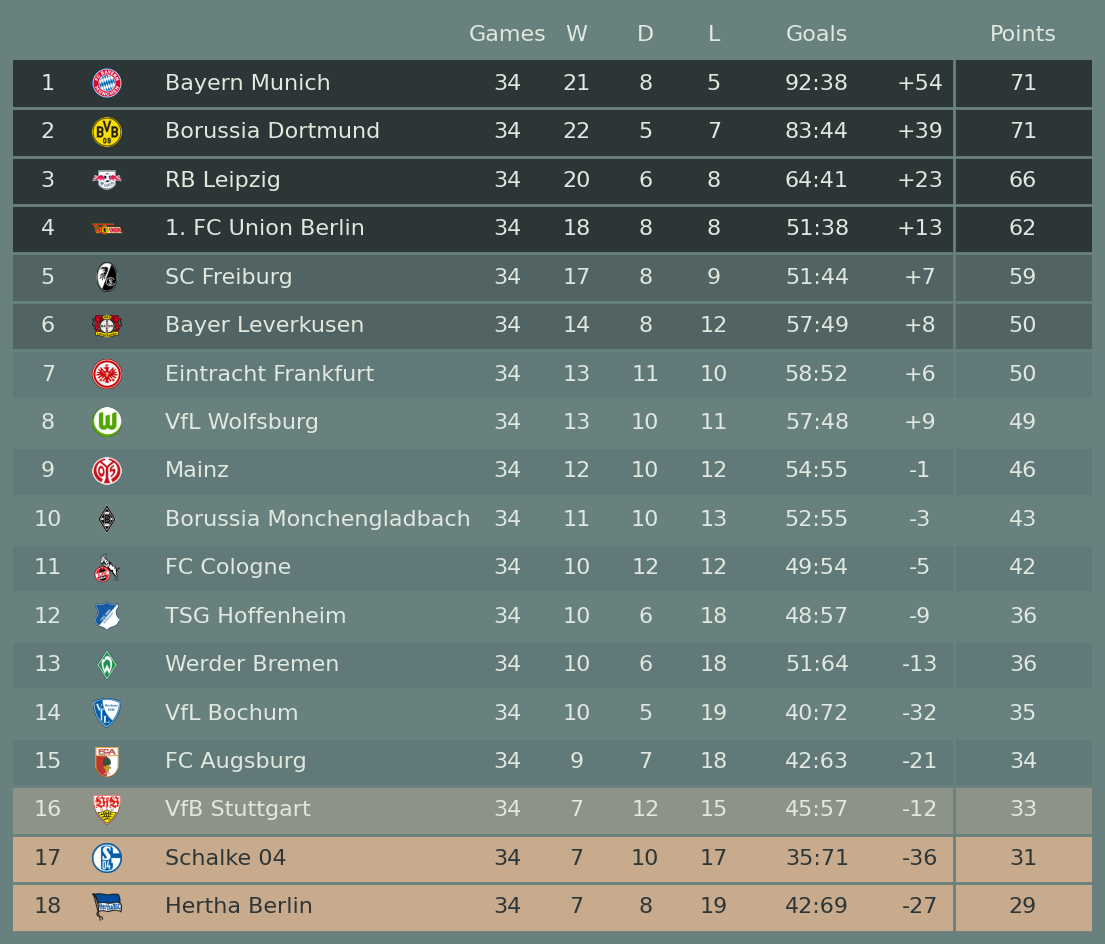

In [90]:
fig, ax = plt.subplots(figsize=(14, 12))

plt.rcParams["text.color"] = text_color
# 设置绘图字体
# plt.rcParams["font.family"] = "Roboto"

# 设置背景颜色
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    perform,
    column_definitions=table_col_defs,
    row_dividers=True,
    col_label_divider=False,
    footer_divider=True,
    index_col="rank",
    columns=table_cols,
    even_row_color=row_colors["even"],
    footer_divider_kw={"color": bg_color, "lw": 2},
    row_divider_kw={"color": bg_color, "lw": 2},
    column_border_kw={"color": bg_color, "lw": 2},
    # 如果设置字体需要添加"fontname": "Roboto"
    textprops={"fontsize": 16, "ha": "center"},
)


# 设置不同行的颜色
for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_colors["top4"])
    
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["top6"])
    
table.rows[15].set_facecolor(row_colors["playoffs"])

for idx in [16, 17]:
    table.rows[idx].set_facecolor(row_colors["relegation"])
    table.rows[idx].set_fontcolor(row_colors["top4"])


fig.savefig(
    "bohndesliga_table_recreation.png",
    facecolor=fig.get_facecolor(),
    bbox_inches='tight',
    dpi=300,
)

# 3 参考

+ [plottable](https://github.com/znstrider/plottable)
+ [plottable-doc](https://plottable.readthedocs.io/en/latest/index.html#)
+ [plottable-example_notebooks](https://github.com/znstrider/plottable/tree/master/docs/example_notebooks)